<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Préparation des données</h1>
<br/>
<br/>
  

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 25px; color: #3498db">1- <u>reduction du nombre de variable de base_edu </u></h1>
    

In [ ]:
!pip install fastparquet
!pip install rpy2
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#chemin de la Base de données; 
#commentez l'url et vous remplacez par votre chemin sans supprimer!!!!!

url="C:/Users/damso/Documents/data/base_Edu.parquet"
base_Edu=pd.read_parquet(url)
base_Edu.head()

,unique_learner_id,days_between_signup_and_first_activity,days_between_order_and_first_activity,first_theory_activity_date,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,weekly_study_objective,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
0,3838161406066513919,41,0,2017-12-17 15:00:23.000000,265,0,3,0,3,<NA>,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
1,5829430568065349352,0,0,2022-07-07 12:02:53.000000,27,0,0,0,11,<NA>,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
2,7677180318050051984,787,788,2022-05-10 01:35:49.000000,295,0,0,0,73,240,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0
3,-5150597998144597550,615,616,2024-04-18 04:56:03.262330,138,0,0,0,75,<NA>,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
4,969323468959211246,169,170,2019-03-19 12:32:56.000000,554,0,0,0,41,120,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0


In [5]:
print(base_Edu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 477 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(72), boolean(254), datetime64[us](1), float64(150)
memory usage: 450.9 MB
None


La base de données compte donc 477 variables dont 72 de type Int, 254 de type boolean, 1 de type datetime et 150 de type float soit au total 254 variables qualitatives (**boolean**) et 221 variables quantitatives(**float + int** en excluant les identifiants) sans oublier la variable de type **datetime**.

Nous commencons par épurer la base données avant de passer à la réduction de dimension. On s'intéressera aux valeurs manquantes. 

In [6]:
missing_value=(base_Edu.isnull().sum()/len(base_Edu))
missing_value[missing_value>0]
missing_value[missing_value>0].describe()

count    404.000000
mean       0.743390
std        0.279055
min        0.047720
25%        0.666710
50%        0.842345
75%        0.918625
max        1.000000
dtype: float64

La base de données comporte donc 404 variables avec valeurs manquantes sur le total des 476 variables de la base ce qui n'est pas du tout négligeable. Voyons combien de valeurs manquantes at-on par type de variables. 

In [ ]:
print(base_Edu.select_dtypes("int").isnull().any().sum()," variables de type int ont des valeurs manquantes")
print(base_Edu.select_dtypes("float").isnull().any().sum()," variables de type float ont des valeurs manquantes")
print(base_Edu.select_dtypes("boolean").isnull().any().sum()," variables de type boolean ont des valeurs manquantes")
print(base_Edu.select_dtypes("datetime").isnull().any().sum()," variables de type datetime ont des valeurs manquantes")

48  variable de type int ont des valeurs manquantes
103  variable de type float ont des valeurs manquantes
253  variable de type boolean ont des valeurs manquantes
0  variable de type datetime ont des valeurs manquantes


La seule variable de type datetime n'a donc pas de valeurs manquantes.  Analysons de plus près les proportions de valeurs manquantes des autres types

In [7]:
miss_bool=base_Edu.select_dtypes("boolean").isnull().sum()/len(base_Edu)
miss_bool[miss_bool>0].describe()

count    253.000000
mean       0.903116
std        0.072136
min        0.695085
25%        0.837765
50%        0.883305
75%        1.000000
max        1.000000
dtype: float64

Les variables de type boolean comporte pratiquement tous assez de valeurs manquantes avec un minimum de 69% et un maximum de 100% du total des observations

Les valeurs manquantes de la base ne sont pas complètement aléatoires. Elles ne sont pas pour la plupart le fruit d'une mauvaise collecte de données. La présence de valeurs manquantes dans cette base est due à diverses raisons notamment le fait que plusieurs individus de la base n'ont pas encore passé d'examen pour le permis. Plusieurs questions(variables) n'ont de sens que dans le cas où le premier examen est passé. Il y a donc une part d'information apporté par ces valeurs manquantes que nous devons inclure dans nos analyses. Pour les variables booléenne, nous pouvons régler ce prblème c'est à dire prendre en compte l'information apportée par ces valeurs manquantes en transformant les variables booléennes en variable catégorielles en considérant les valeurs manquantes comme une catégorie(True=1,False=0 et NA=2).

In [8]:
#print(base_Edu.select_dtypes('category'))
def encode_column_with_na(col):
    mapping = {True: 1, False: 0, pd.NA: 2}  # Encoder les valeurs booléennes et <NA>
    return col.map(mapping)
colboo=base_Edu.select_dtypes("boolean").columns
for col in colboo:
    base_Edu[col] = encode_column_with_na(base_Edu[col]).astype("category")
#base_Edu["is_first_exam_success"].cat.categories


Passons maintenant aux variables quantitatives (int+float)

In [9]:
miss_quant=base_Edu.select_dtypes(include=["int","float"]).isnull().sum()/len(base_Edu)
miss_quant[miss_quant>0].describe()

count    151.000000
mean       0.475770
std        0.292138
min        0.047720
25%        0.184915
50%        0.483995
75%        0.736010
max        0.941710
dtype: float64

Pour les variables quantitatives, la distribution des valeurs manquantes est plus étendue. On enregistre 151 variables quantitatives avec valeurs manquantes. On a un minimum de 4% et un maximum de 94% de valeurs manquantes par rapport au total d'observation(nous rappelons 200000 obervations). La nature des variables et la distribution des valeurs manquantes dans ce cas ne facilite pas la capture de l'information apportée par la présence de ces valeurs manquantes. On pourrait opter pour une imputation par KNN ou par imputation itérative (MICE) mais cela risque de modifier et significativement les corrélations existant déjà entre les variables introduisant ainsi un important biais et au vue de la taille de l'echantillon, cela demanderait un temps d'excution énorme. On choisit ici donc de procéder à une imputation par la médiane après suppression des variables avant un taux élevé de valeurs manquantes pour minimiser le biais. Cela permettra de ne pas trop distordre les distributions existentes.

In [10]:
miss_quant[miss_quant<=0.20].describe()

count    118.000000
mean       0.054362
std        0.074368
min        0.000000
25%        0.000000
50%        0.000000
75%        0.106310
max        0.194530
dtype: float64

Nous choisissons le seuil de 20% de valeurs manquantes. Ce seuil nous parait raisonnable puisqu'il est relativement faible et n'entraine pas la suppression d'un grand nombre de variables quantitatives (118 sont conservées sur un total de 151)

In [11]:
#suppression des variables avec plus de 20% de valeurs manquantes
base_Edu=base_Edu.drop(columns=miss_quant[miss_quant>0.20].index)
#Imputation par la médiane
col=base_Edu.select_dtypes(exclude='category').columns
base_Edu[col] = base_Edu[col].fillna(base_Edu[col].median())

In [12]:
base_Edu.isnull().any().sum()

np.int64(0)

In [13]:
df1 = base_Edu.select_dtypes(exclude=['datetime64'])  # Colonnes non datetime64
df2 = base_Edu.select_dtypes(include=['datetime64']) #colonnes datetime
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 372 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(47), category(254), float64(71)
memory usage: 237.5 MB


In [14]:
#sauvegarde des données sans var date
df1.to_parquet('data_Edu.parquet', index=False)

Plus aucune valeur manquante. La base de données enfin prête, on peut passer aux opérations de réduction de dimension

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;color:rgb(47, 99, 220);font-size: 30px">
<u>
Réduction de dimension</u>
</p>
<br/>

Etant donnée la dimension de la base de données( beaucoup de variables), ce sera très complexe voir impossible de faire des analyses ou entrainer un modèle directement sur cette base. Il est donc important voir optimale de faire au préalable une réduction de dimension. Pour ce faire, nous allons utiliser différentes approches de réduction de dimension, faire des comparaisons puis retenir la meilleure approche dans ce cas. Il s'agira principalement de faire une **analyse enn composante principale (ACP)** , une **FAMD** et utiliser **un autoencodeur**.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
1- Analyse en composantes principales (ACP) </u>
</p>
<br/>

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
2- Analyse Factorielle des Composantes Mixtes (FAMD) </u>
</p>
<br/>

<p>
Par soucis de puissance de calcul, nous ne conserverons que 3000 individu pour cette réduction de dimension. 
</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_parquet("data_Edu.parquet")
df_sample=df.sample(n=3000, random_state=42)
df_sample.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 119737 to 36554
Columns: 372 entries, unique_learner_id to pct_no_objective_weeks
dtypes: float64(71), int64(301)
memory usage: 8.5 MB


In [ ]:
import os
import sys
import io

#sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')


#definir l'emplacement de l'environnement r et des librairies utilisés
os.environ['R_HOME'] = r"C:\Program Files\R\R-4.4.2"  # Exemple : '/home/user/anaconda3/envs/mon_env/lib/R'
os.environ['R_LIBS_USER'] = r"C:\Users\damso\AppData\Local\R\win-library\4.4"
# Optionnel : Ajouter le chemin des DLLs de R pour éviter des erreurs de chargement
#os.environ['PATH'] += os.pathsep + r"C:\Program Files\R\R-4.4.2\bin\x64"

# Importer rpy2 et activer la conversion pandas2ri
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

#ro.r('library(factoextra)')
#ro.r('library(FactoMineR)')

# Charger les données dans R

base_AE = df_sample.reset_index(drop=True)

ro.globalenv['data'] = pandas2ri.py2rpy(base_AE)

# Récupérer les colonnes de type 'category'
category_columns = base_AE.select_dtypes(include=['category']).columns

# Convertir les noms des colonnes en liste pour les passer à R
ro.globalenv['category_columns'] = category_columns.tolist()


ro.r('''
    # Vérifier si les bibliothèques sont installées et les charger
    #if (!require("ggplot2")) install.packages("ggplot2")
    #if (!require("FactoMineR")) install.packages("FactoMineR")
    #if (!require("factoextra")) install.packages("factoextra")
     
    # Récupérer les noms des colonnes de type 'category' de Python
    category_columns <- as.character(category_columns)

    # Appliquer la conversion en factor sur ces colonnes
    data[category_columns] <- lapply(data[category_columns], as.factor)
    # Afficher les niveaux de chaque variable factor
    # Filtrer uniquement les variables de type factor
    #library(RColorBrewer)
    #library(ggplot2)
    library(FactoMineR)
    library(factoextra)
    # Exemple pour toutes les variables qualitatives
    result <- FAMD(data, ncp = 9, graph = FALSE)

    res <-summary(result)
    result_df <- as.data.frame(result$ind$coord) # Récupérer les coordonnées des individus
    result_var_df <- as.data.frame(result$var$coord) # Récupérer les coordonnées des individus
''')
# #Récupérer les résultats en Python
result_df = ro.r('result_df')
result_var_df = ro.r('result_var_df')
res = ro.r('res')
print(res)

result_df = pandas2ri.rpy2py(result_df)
result_var_df = pandas2ri.rpy2py(result_var_df)
result_var_df.info()
#print("Résultats de la FAMD :\n", result_df)

C:\Users\damso\AppData\Roaming\Python\Python312\site-packages\rpy2\robjects\pandas2ri.py:65: UserWarning: Error while trying to convert the column "unique_learner_id". Fall back to string conversion. The error is: integer -5875158997658804378 does not fit 'int'
  warnings.warn('Error while trying to convert '



Call:
FAMD(base = data, ncp = 9, graph = FALSE) 


Eigenvalues
                      Dim.1  Dim.2  Dim.3  Dim.4  Dim.5  Dim.6  Dim.7  Dim.8
Variance             85.122 11.400  8.557  8.069  5.477  4.883  4.694  4.259
% of var.             2.600  0.348  0.261  0.246  0.167  0.149  0.143  0.130
Cumulative % of var.  2.600  2.948  3.209  3.456  3.623  3.772  3.916  4.046
                      Dim.9
Variance              4.188
% of var.             0.128
Cumulative % of var.  4.174

Individuals (the 10 first)
                                            Dist     Dim.1     ctr    cos2  
0                                      |  60.804 | -12.743   0.064   0.044 |
1                                      |  57.652 |  -3.990   0.006   0.005 |
2                                      |  55.282 |   5.011   0.010   0.008 |
3                                      |  56.689 |   4.411   0.008   0.006 |
4                                      |  55.675 |   4.557   0.008   0.007 |
5                         

<h2>
Informations sur les dimensions(composantes) conservées
</h2>

In [43]:
import pandas as pd

# Extraire les informations sur les eigenvalues
eigenvalues = ro.r('as.data.frame(result$eig)')

# Convertir en DataFrame Python
eigenvalues_df = pandas2ri.rpy2py(eigenvalues)

# Renommer les colonnes pour plus de clarté
eigenvalues_df.columns = ["Variance", "% Variance", "Cumulative % Variance"]

print(eigenvalues_df)


         Variance  % Variance  Cumulative % Variance
comp 1  85.121954    2.599938               2.599938
comp 2  11.399734    0.348190               2.948127
comp 3   8.556873    0.261358               3.209486
comp 4   8.069456    0.246471               3.455957
comp 5   5.477271    0.167296               3.623253
comp 6   4.883265    0.149153               3.772405
comp 7   4.693552    0.143358               3.915764
comp 8   4.258613    0.130074               4.045837
comp 9   4.188211    0.127923               4.173761


In [50]:
result_var_df.head()

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
days_between_signup_and_first_activity,4.029720e-02,1.734117e-02,7.165135e-04,4.471962e-05,2.538506e-03,7.054167e-02,1.247808e-03,4.177752e-02,2.076960e-02
days_between_order_and_first_activity,4.702958e-02,2.895156e-02,4.663194e-05,1.852625e-03,1.372615e-03,5.821330e-02,6.590470e-04,3.769572e-02,3.576001e-02
days_between_first_and_last_activities,5.823505e-04,6.675616e-06,1.142962e-04,6.502066e-04,6.037637e-02,5.771013e-01,3.572846e-02,2.625207e-03,1.441229e-02
chapter_before_success_count,1.600966e-35,8.713975e-30,2.636790e-32,6.365678e-30,3.797583e-32,6.856119e-31,1.322528e-30,8.663140e-31,9.321504e-32
serie_before_success_count,3.103956e-02,1.477115e-01,1.071298e-01,1.205834e-05,1.300957e-01,2.197480e-04,1.055568e-02,6.148864e-03,6.695457e-03


In [44]:
print(len(result_df.columns))
result_var_df.info()

9
<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, days_between_signup_and_first_activity to unique_learner_id
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dim.1   372 non-null    float64
 1   Dim.2   372 non-null    float64
 2   Dim.3   372 non-null    float64
 3   Dim.4   372 non-null    float64
 4   Dim.5   372 non-null    float64
 5   Dim.6   372 non-null    float64
 6   Dim.7   372 non-null    float64
 7   Dim.8   372 non-null    float64
 8   Dim.9   372 non-null    float64
dtypes: float64(9)
memory usage: 29.1+ KB


 <b> Nous avons choisi 09 dimensions, qui contiennent des informations sur 372 variables(de "days_between_signup_and_first_activity" à "unique_learner_id") et contiennent  4,174% de la variance totale.</b>

Nombre optimal de dimensions selon la méthode de Kaiser: 1


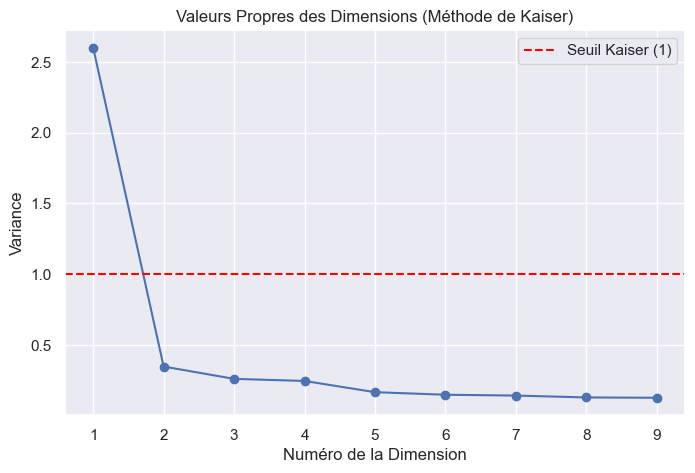

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Récupérer les valeurs propres issues de la FAMD
eigenvalues = eigenvalues_df["% Variance"]
eigenvalues = np.array(eigenvalues)

# Méthode de Kaiser : dimensions avec une variance > 1
optimal_dimensions = np.sum(eigenvalues > 1)

print(f"Nombre optimal de dimensions selon la méthode de Kaiser: {optimal_dimensions}")

# Tracer les valeurs propres
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='red', linestyle='--', label='Seuil Kaiser (1)')
plt.title("Valeurs Propres des Dimensions (Méthode de Kaiser)")
plt.xlabel("Numéro de la Dimension")
plt.ylabel("Variance")
plt.legend()
plt.show()


<h2> La méthode de Kaiser nous suggère via ca graphique de ne conserver que la 1<sup>ere</sup> composante
</h2>

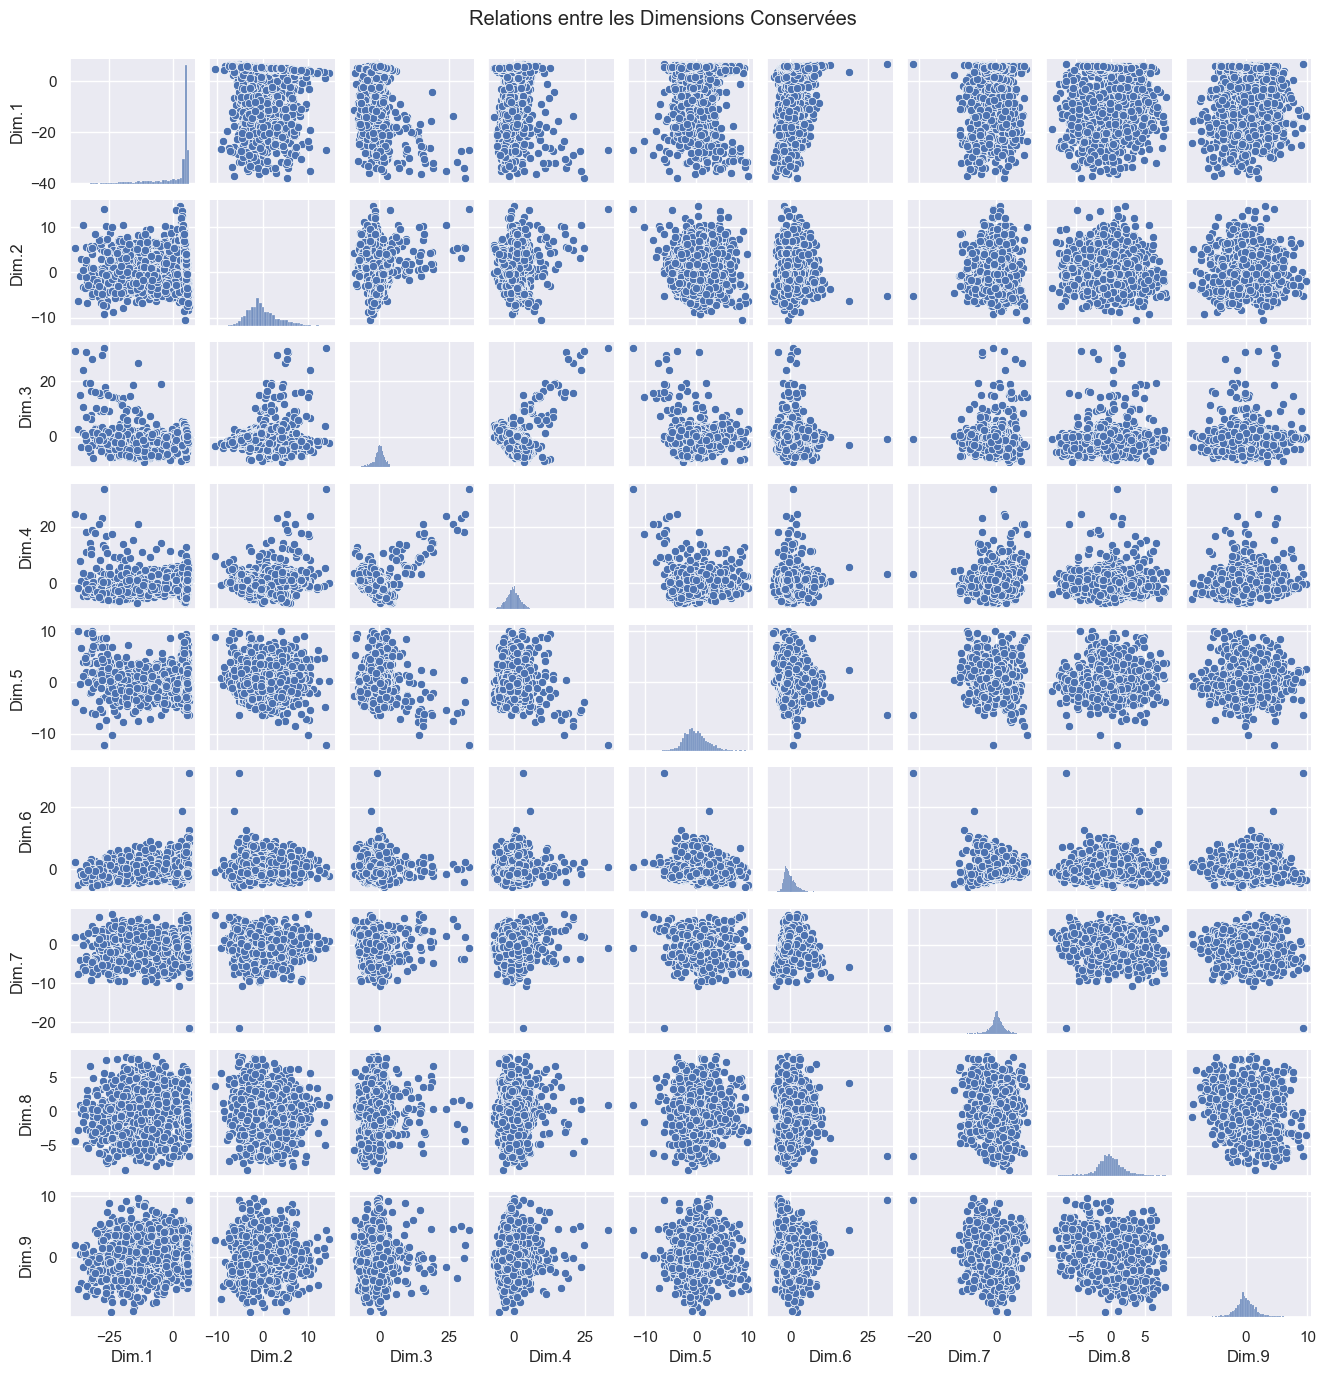

In [58]:
import seaborn as sns

# Charger les coordonnées après la réduction dimensionnelle
result_df.columns = [f'Dim.{i+1}' for i in range(len(result_df.columns))]
# Pairplot pour visualiser les relations entre dimensions
sns.pairplot(result_df, height=1.5)
plt.suptitle("Relations entre les Dimensions Conservées", y=1.02)
plt.show()


<b>interprétation </b>

1. **Indépendance relative entre dimensions** :  
   Les nuages de points montrent peu de corrélation forte ou linéaire apparente entre la majorité des dimensions. Cela suggère que les dimensions retenues après la FAMD (Facto-Mixed Data Analysis) capturent des aspects distincts de la variabilité des données.

2. **Formes et densités des points** :  
   Les distributions affichent des concentrations variables de points dans certaines régions. Par exemple :
   - **Dimension 1** semble avoir des valeurs extrêmes (très négatives), ce qui peut indiquer une caractéristique particulièrement influente ou un effet des données initiales.
   - Certaines relations présentent des formes non linéaires ou des regroupements, ce qui pourrait indiquer des structures ou sous-groupes potentiels dans les données.

3. **Répartition des données** :  
   - Les histogrammes diagonaux montrent des distributions souvent symétriques, mais avec des étalements variables selon les dimensions.
   - Les dimensions comme 1, 2, et 6 semblent avoir des asymétries ou des pics plus prononcés.

4. **Homogénéité globale** :  
   Bien que certaines dimensions montrent des particularités (par exemple, des regroupements ou des étalements asymétriques), le graphique global ne révèle pas de clusters évidents ou de relations très marquées, ce qui est cohérent avec des dimensions indépendantes après réduction.

### Conclusion :
Ces graphiques montrent que les 9 dimensions retenues résument bien la variabilité des données tout en restant indépendantes les unes des autres. On pourrait explorer davantage les dimensions ayant des valeurs extrêmes ou des regroupements pour mieux comprendre les structures latentes.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
3- Auto Encoder </u>
</p>
<br/>